In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# (2.5 - 3.5) Метод наименьших квадратов

In [ ]:
!gdown 1OkKuyXHnC8-Whlvpve7BjlMiLJ7uHrTx

Downloading...
From: https://drive.google.com/uc?id=1OkKuyXHnC8-Whlvpve7BjlMiLJ7uHrTx
To: /content/Ice Cream Sales - temperatures.csv
100% 3.68k/3.68k [00:00<00:00, 7.64MB/s]


Перед вами - [датасет](https://www.kaggle.com/datasets/raphaelmanayon/temperature-and-ice-cream-sales/data) с зависимостью продаж мороженого от температуры на улицу (в Фаренгейтах). Постройте линейную аппроксимацию данных, применив метод наименьших квадратов.

Визуализируйте результат, построив график зависимости продаж от температуры (*plt.scatter*) и получившееся приближение (*plt.plot*).

**TIP:** в данных есть повторения, поэтому требуется предобработка (для каждой температуры возьмите соответствующее или максимальное, или среднее значение).

In [ ]:
from numpy.polynomial.chebyshev import chebfit
from numpy.polynomial import Polynomial


data = pd.read_csv('Ice Cream Sales - temperatures.csv') # загружаем данные
data = data.groupby('Temperature').mean() # считаем среднее по температуре
data = data.reset_index() # сбрасываем индекс, чтобы температура стала столбцом


temp = data['Temperature']
profit = data['Ice Cream Profits']

Реализация готовыми функциями

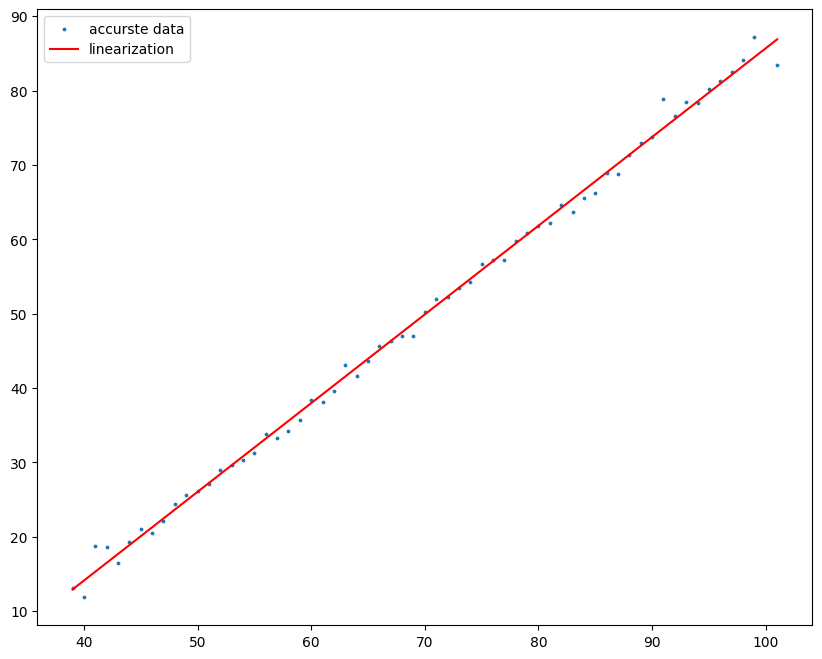

In [ ]:
c = chebfit(temp, profit, deg=1) # по данным значениям восстанавливаем коэффы полинома первой степени
poly = Polynomial(c) # сам полином

# отрисовка
fig = plt.figure(figsize = (10,8))
plt.scatter(temp, profit, label='accurste data', s = 3)
plt.plot(temp, poly(temp), label='linearization', color='r')
plt.legend()
plt.show()

Моя реализация

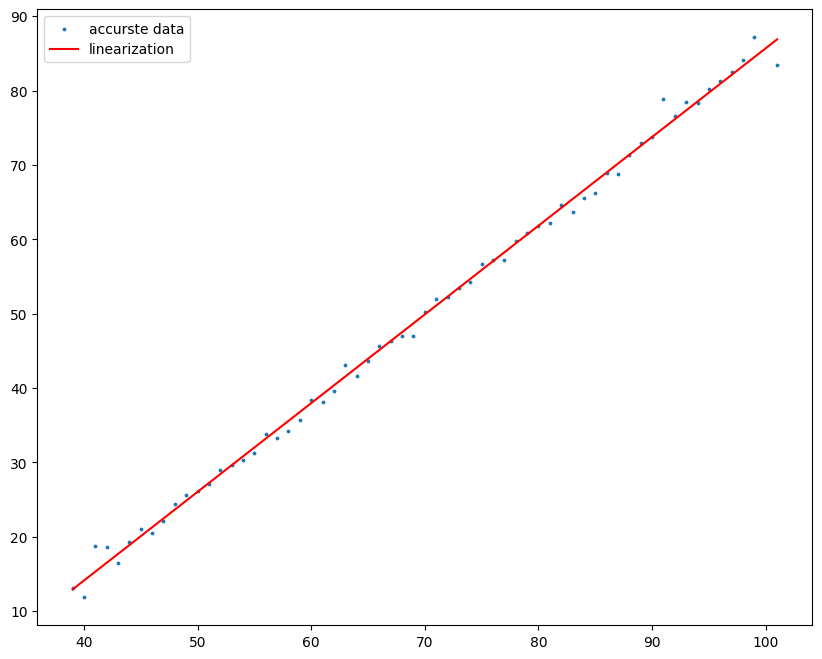

In [ ]:
# y = ax + b
sum_y = sum(profit)
sum_x = sum(temp)
sum_xy = sum([temp[i]*profit[i] for i in range(len(temp))])
sum_sqx = sum([i*i for i in temp])
n = len(temp)

# вычисляем коэффы апроксимирующей прямой
a = (sum_y * sum_x - n * sum_xy)/(sum_x**2 - n*sum_sqx)
b = (sum_y-a*sum_x)/n
poly = np.poly1d([a, b])

# отрисовка
fig = plt.figure(figsize = (10,8))
plt.scatter(temp, profit, label='accurste data', s = 3)
plt.plot(temp, poly(temp), label='linearization', color='r')
plt.legend()
plt.show()

# (2.5-3.5) Псевдообратная матрица

In [ ]:
!gdown 1pVI_yi7AKfsudZl6VG4ZwA-8mfx0Gg3q

Downloading...
From: https://drive.google.com/uc?id=1pVI_yi7AKfsudZl6VG4ZwA-8mfx0Gg3q
To: /content/Student_Performance.csv
100% 175k/175k [00:00<00:00, 78.3MB/s]


Другой [датасет](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression) - об успеваемости студентов. Попробуйте предобработать данные (перевести категориальные переменные в числовые) и построить псевдообратную матрицу для линейной аппроксимации, а затем решить систему уравнений $AX=\mathcal{B}$ и найти ее псевдорешение.

Также решение можно проверять на датасете из предыдущего пункта.

In [ ]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv('Student_Performance.csv')
df = df.drop_duplicates()
df['Extracurricular Activities'].replace(['No', 'Yes'], [0, 1], inplace=True)
X = df.drop('Performance Index', axis=1)
X.insert(5, "Free", [1 for i in range(len(X.index))], True) # столбец свободных членов
Y = df['Performance Index']

# рaзбиваем выборку на обучающаю и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

Реализация готовыми функциями

MSE =  4.134632546087054
MAE =  1.6132117612922168


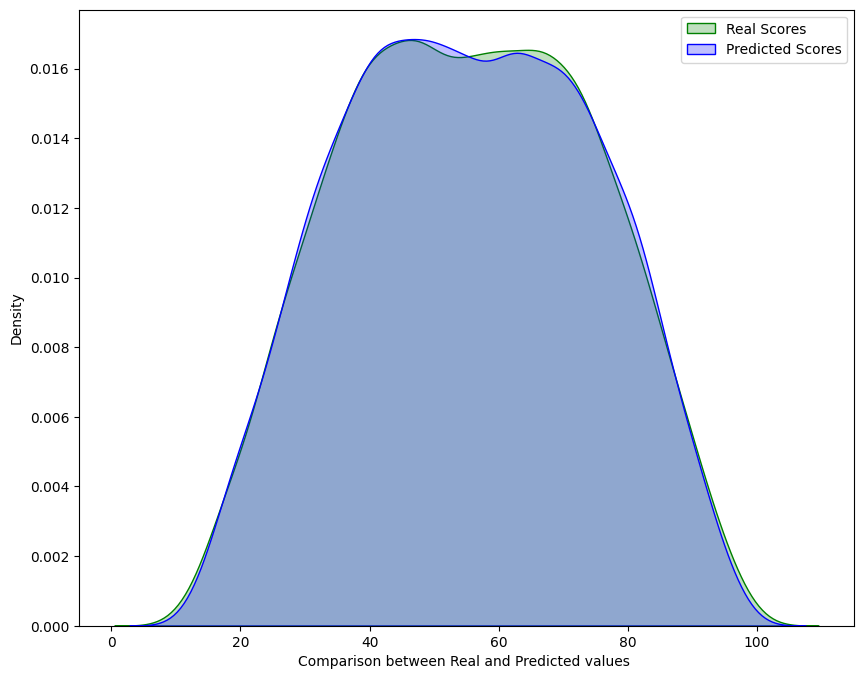

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)

print('MSE = ', mean_squared_error(Y_test,pred)) # средняя квадратичная ошибка
print('MAE = ', mean_absolute_error(Y_test,pred)) # средняя абсолютная ошибка

# отрисовка
compare = pd.DataFrame({'Real':Y_test,'Predicted':pred})
compare.reset_index().drop('index',axis=1,inplace=True)

plt.figure(figsize=(10,8))
plt.xlabel('Comparison between Real and Predicted values ')
a=sns.kdeplot(compare['Real'],fill=True,color='g')
b=sns.kdeplot(compare['Predicted'],fill=True, color='b')
plt.legend(labels=['Real Scores','Predicted Scores'])
plt.show()

Моя реализация

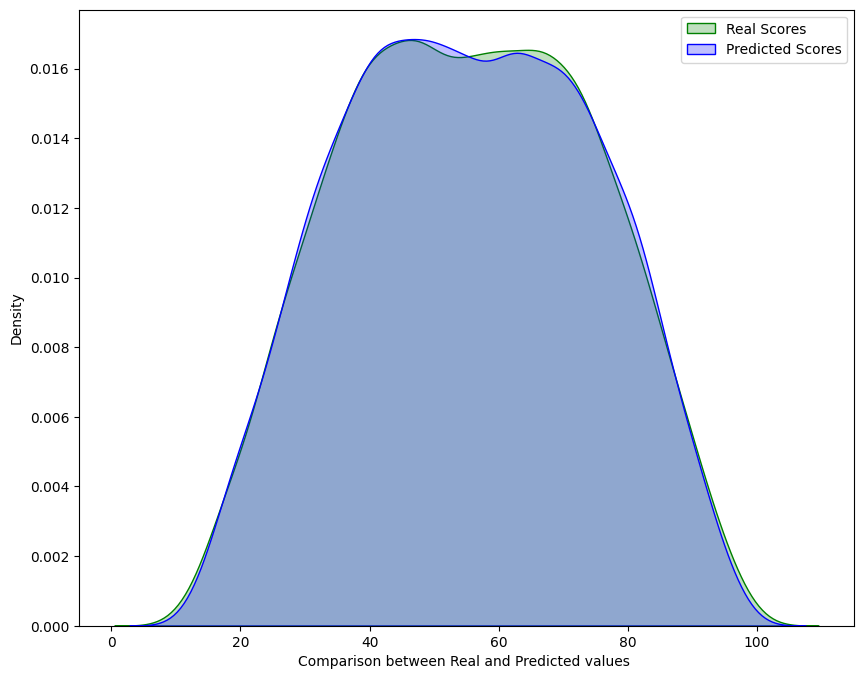

In [ ]:
X_train_T = np.transpose(X_train)
X_inv = np.linalg.inv(np.matmul(X_train_T, X_train))
X_pseudo = np.matmul(X_inv, X_train_T)

coef = np.matmul(X_pseudo, np.array([[i] for i in Y_train]))
pred = np.matmul(X_test.to_numpy(), coef.to_numpy()).transpose()[0] # получили матрицу 1х1 - берем первый элемент

print('MSE = ', mean_squared_error(Y_test,pred)) # средняя квадратичная ошибка
print('MAE = ', mean_absolute_error(Y_test,pred)) # средняя абсолютная ошибка

# отрисовка
compare = pd.DataFrame({'Real':Y_test,'Predicted':pred})
compare.reset_index().drop('index',axis=1,inplace=True)

plt.figure(figsize=(10,8))
plt.xlabel('Comparison between Real and Predicted values ')
a=sns.kdeplot(compare['Real'],fill=True,color='g')
b=sns.kdeplot(compare['Predicted'],fill=True, color='b')
plt.legend(labels=['Real Scores','Predicted Scores'])
plt.show()

# (2 - 3) Полином Лагранжа

Данные - зависимость доходности некоторой облигации от ее срока погашения. Нужно построить полином Лагранжа и оценить значение доходности облигации в пропущенные в данных года (**4, 6, 8, 9 лет**)


In [ ]:
# Sample data for the yield curve

maturities = np.array(
    [1, 2, 3, 5, 7, 10]
)  # Maturities in years

interest_rates = np.array(
    [0.02, 0.025, 0.03, 0.035, 0.04, 0.045]
)  # Corresponding interest rates

In [ ]:
import copy
from scipy.interpolate import lagrange
from numpy.polynomial import polynomial as P

Реализация готовыми функциями

Интерполяционный многочлен:

            5             4            3           2
-9.59e-06 x + 0.0002351 x - 0.002027 x + 0.00715 x - 0.005487 x + 0.02014
Недостающие абциссы: 4, 6, 8, 9.
x = 4 => y = 0.033
x = 6 => y = 0.037
x = 8 => y = 0.045
x = 9 => y = 0.048


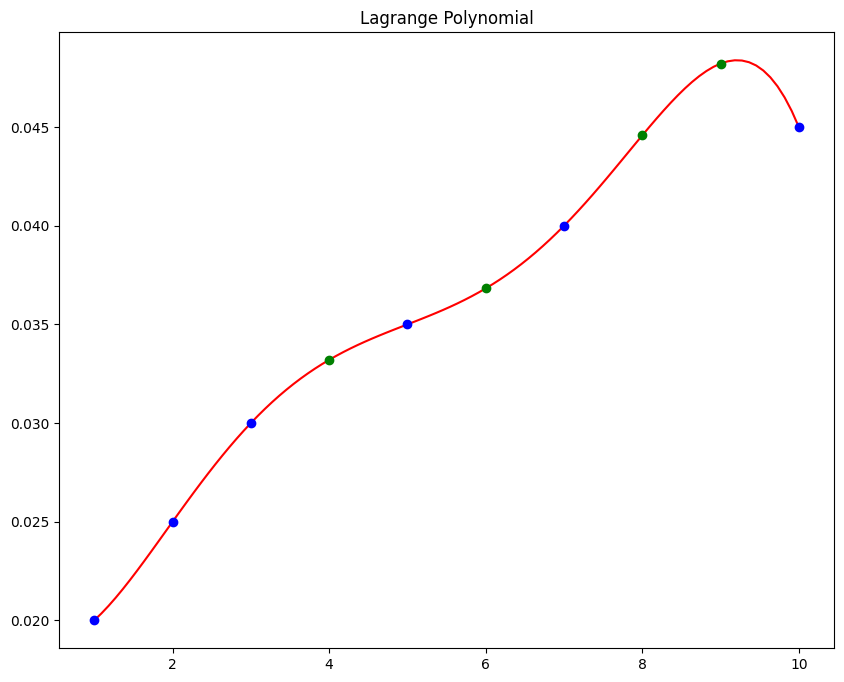

In [ ]:
f = lagrange(maturities, interest_rates)

print('Интерполяционный многочлен:\n\n', f)
# определяем в каких точках нужно предсказать значение
minimum = min(maturities)
maximum = max(maturities)
all = [i for i in range(minimum, maximum + 1)]
needed = set(all)
needed.difference_update(maturities)
print(f'Недостающие абциссы: {", ".join([str(i) for i in needed])}.')
# считаем значения в недостающих точках и выводим:
for i in needed:
    print(f'x = {i} => y = {round(f(i), 3)}')

x_new = np.linspace(1, 10, 100)

# отрисовка
fig = plt.figure(figsize=(10, 8))
plt.plot(x_new, f(x_new), 'r', maturities, interest_rates, 'bo', list(needed), f(list(needed)), 'go')
plt.title('Lagrange Polynomial')
plt.show()

Моя реализация

Интерполяционный многочлен:

            5             4            3           2
-9.59e-06 x + 0.0002351 x - 0.002027 x + 0.00715 x - 0.005487 x + 0.02014
Недостающие абциссы: 4, 6, 8, 9.
x = 4 => y = 0.033
x = 6 => y = 0.037
x = 8 => y = 0.045
x = 9 => y = 0.048


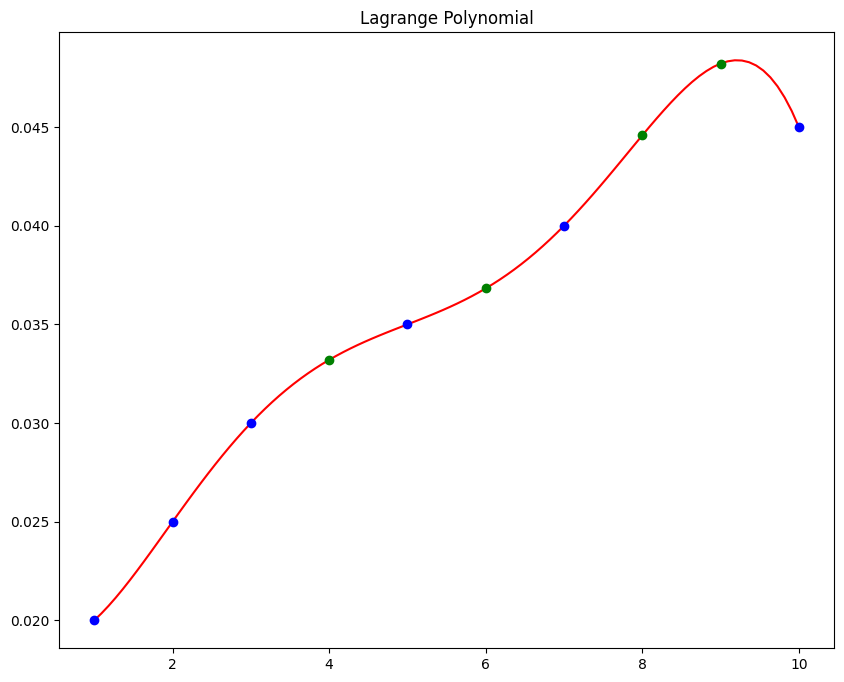

In [ ]:
def calc_coef(i, x, y):
    coef = y[i]
    for j in range(len(x)):
        if j != i:
            coef /= (x[i] - x[j])
    return coef

f = np.poly1d([0])
for i in range(len(interest_rates)):
    coef = np.poly1d(calc_coef(i, maturities, interest_rates))  # коэф при i-ом многочлена
    roots = list(copy.deepcopy(maturities))
    del roots[i]
    cur_f = np.poly1d(np.flip(P.polyfromroots(roots)))  # коэффы i-го многочлена
    cur_f = np.polymul(cur_f, coef)
    f = np.polyadd(f, cur_f)  # складываем многочлены


print('Интерполяционный многочлен:\n\n', f)
# определяем в каких точках нужно предсказать значение
minimum = min(maturities)
maximum = max(maturities)
all = [i for i in range(minimum, maximum + 1)]
needed = set(all)
needed.difference_update(maturities)
print(f'Недостающие абциссы: {", ".join([str(i) for i in needed])}.')
# считаем значения в недостающих точках и выводим:
for i in needed:
    print(f'x = {i} => y = {round(f(i), 3)}')

x_new = np.linspace(1, 10, 100)

# отрисовка
fig = plt.figure(figsize=(10, 8))
plt.plot(x_new, f(x_new), 'r', maturities, interest_rates, 'bo', list(needed), f(list(needed)), 'go')
plt.title('Lagrange Polynomial')
plt.show()